In [56]:
import pandas as pd
import numpy as np
import nibabel as nib
import importlib
import tTsTGrpUtils as tsutil
import pickle
importlib.reload(tsutil)

<module 'tTsTGrpUtils' from '/host/verges/tank/data/daniel/3T7T/z/code/analyses/tTsTGrpUtils.py'>

[MICs] cortex, thickness, thickness, fsLR-5k , 5


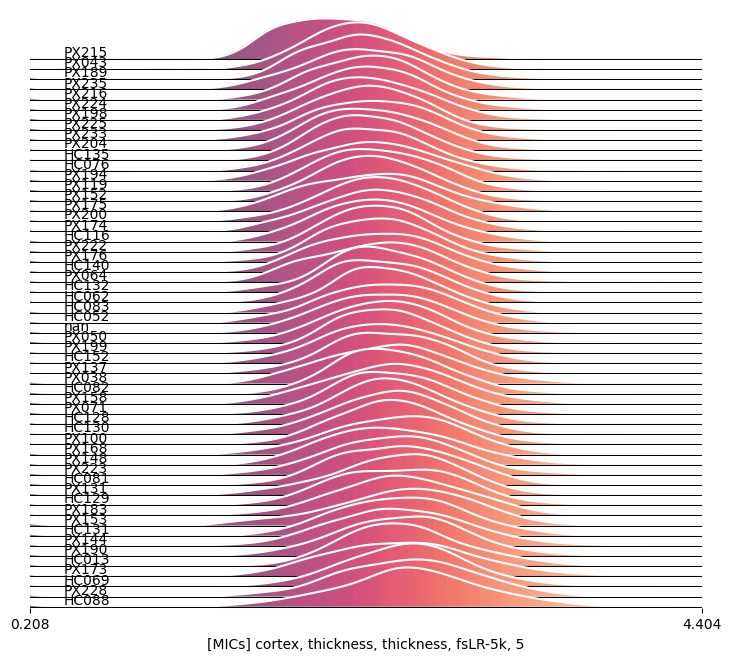

[PNI] cortex, thickness, thickness, fsLR-5k , 5


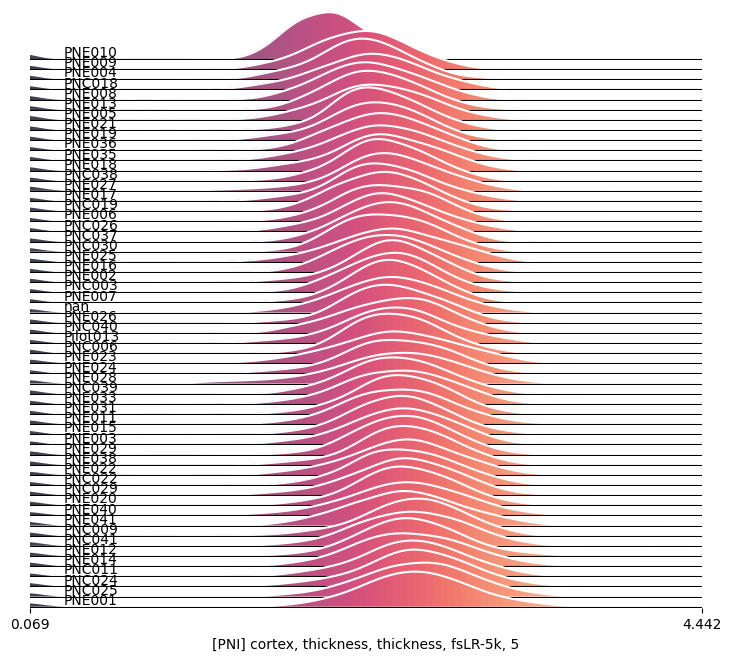

[MICs] cortex, thickness, thickness, fsLR-5k , 10


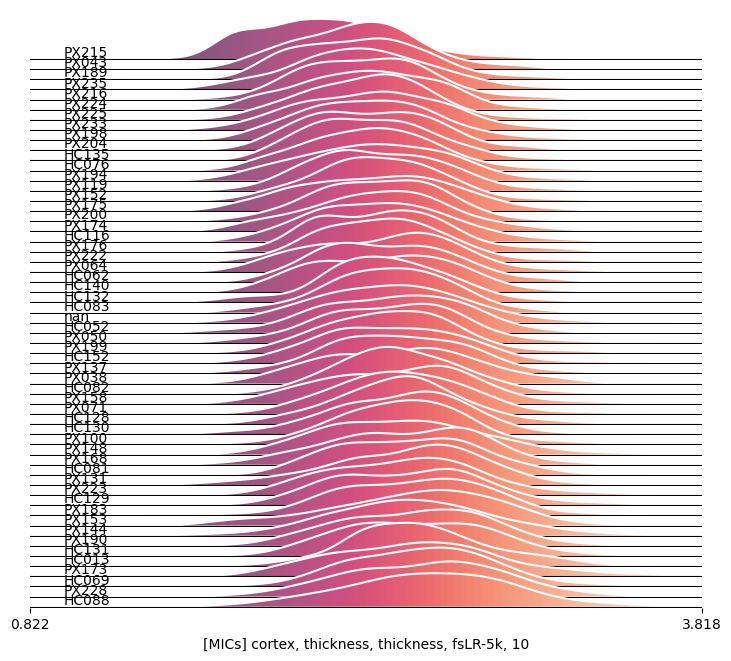

[PNI] cortex, thickness, thickness, fsLR-5k , 10


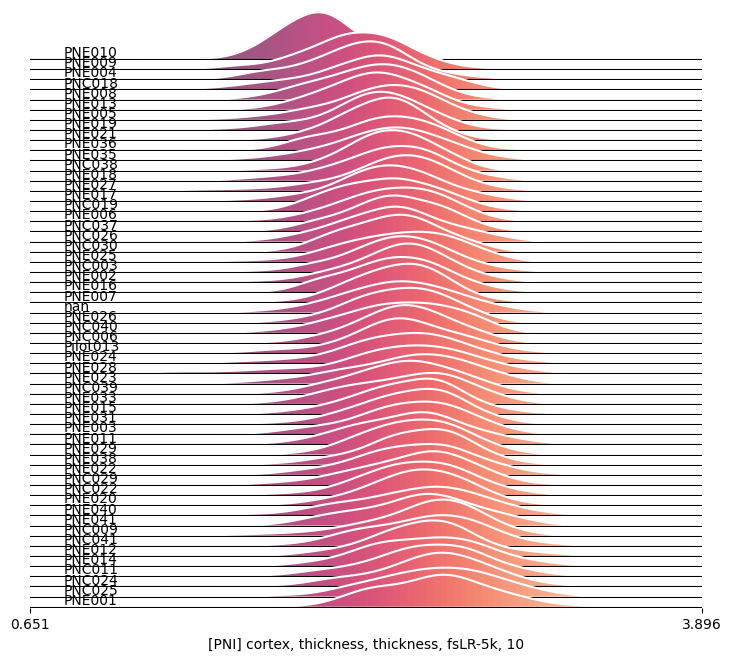

[MICs] cortex, T1map, midthickness, fsLR-5k , 5


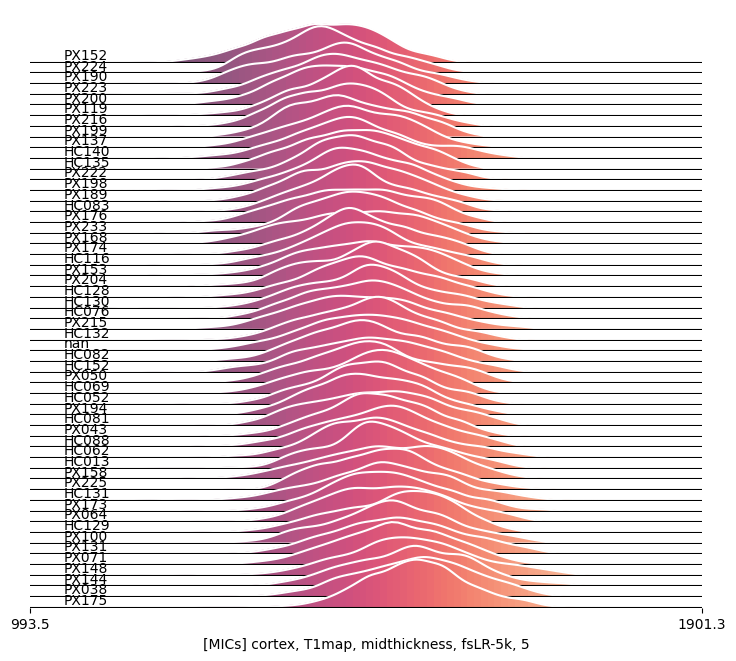

[PNI] cortex, T1map, midthickness, fsLR-5k , 5


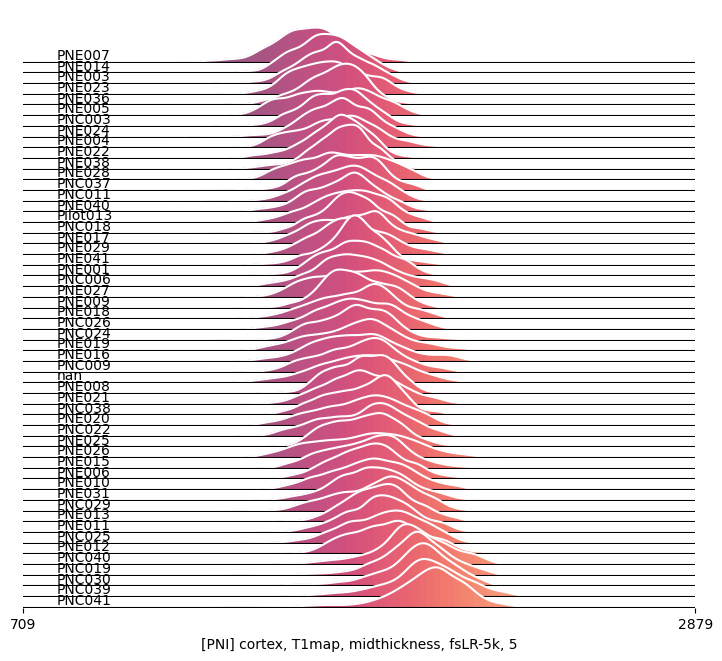

[MICs] cortex, T1map, midthickness, fsLR-5k , 10


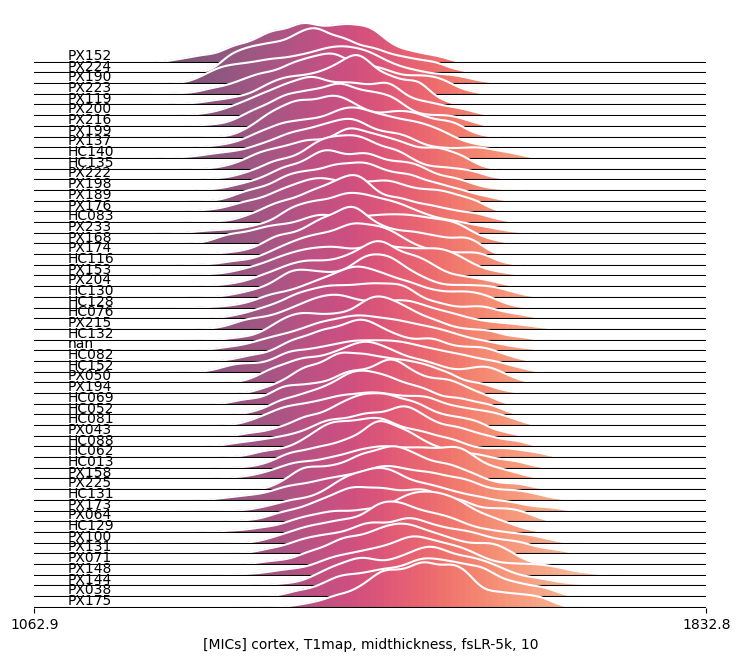

[PNI] cortex, T1map, midthickness, fsLR-5k , 10


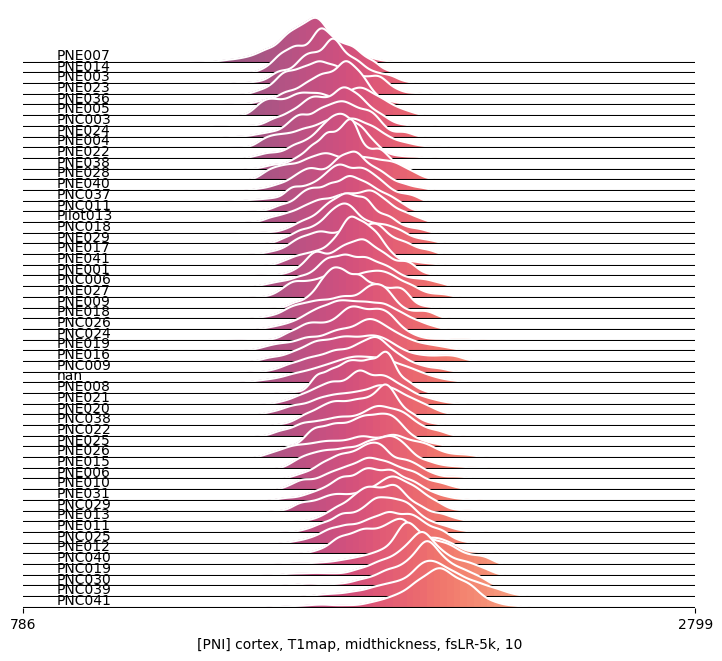

[MICs] cortex, flair, midthickness, fsLR-5k , 5


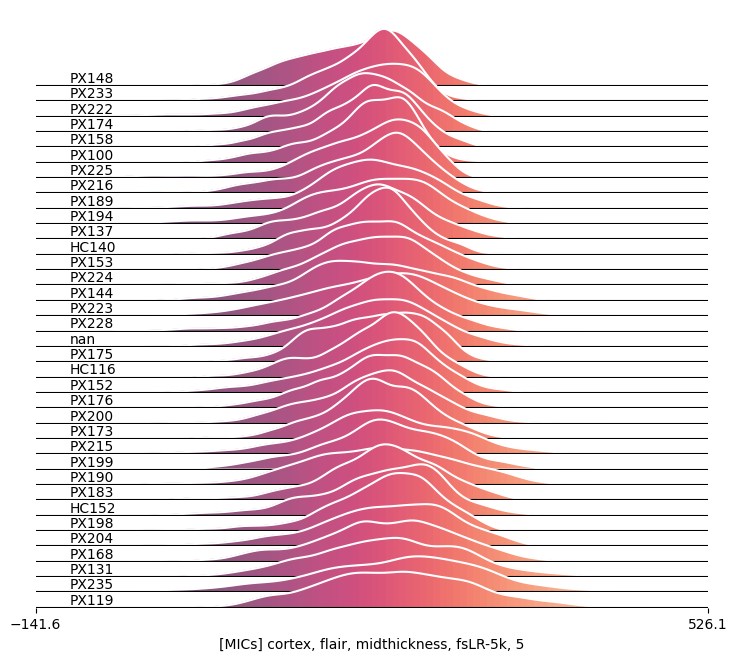

[PNI] cortex, flair, midthickness, fsLR-5k , 5


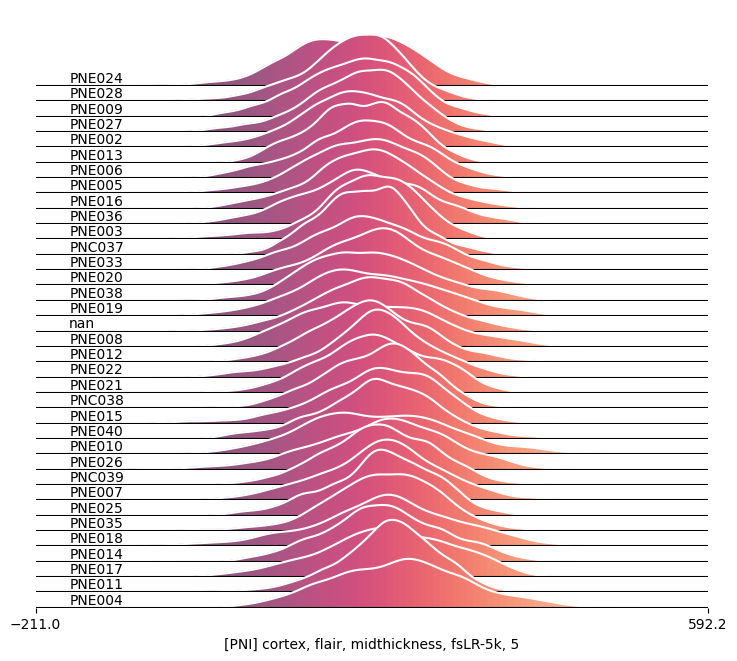

[MICs] cortex, flair, midthickness, fsLR-5k , 10


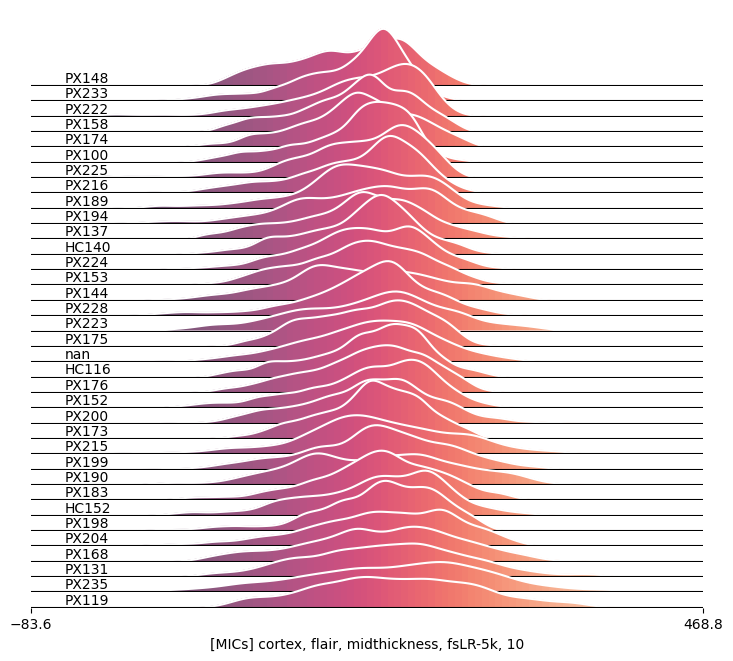

[PNI] cortex, flair, midthickness, fsLR-5k , 10


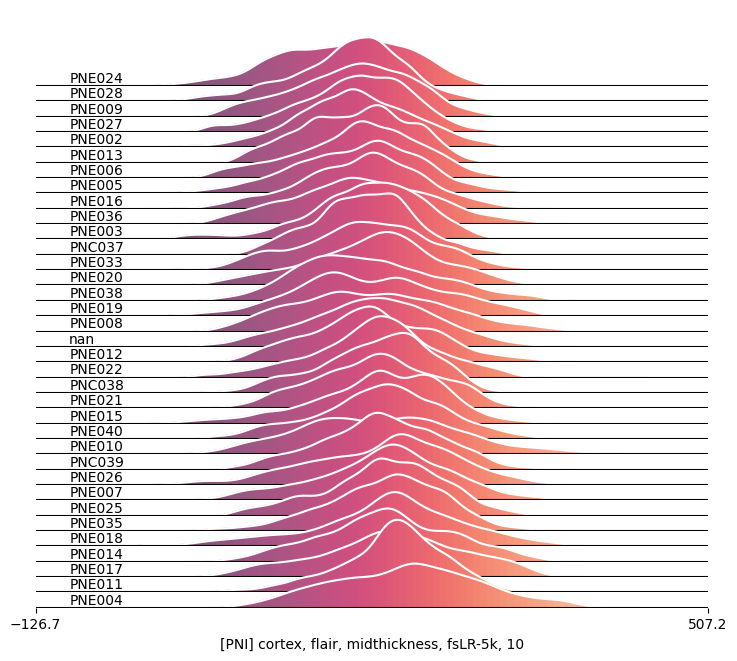

[MICs] hippocampus, thickness, thickness, 0p5mm , 2


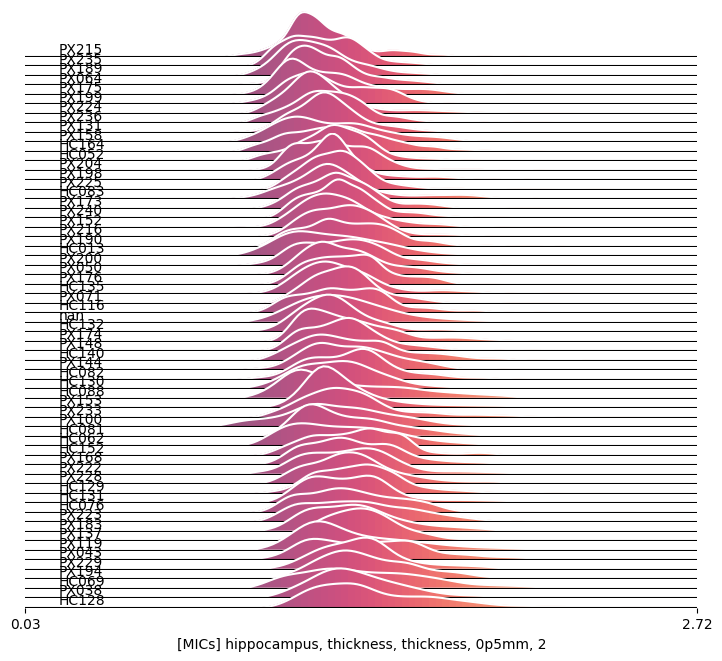

[PNI] hippocampus, thickness, thickness, 0p5mm , 2


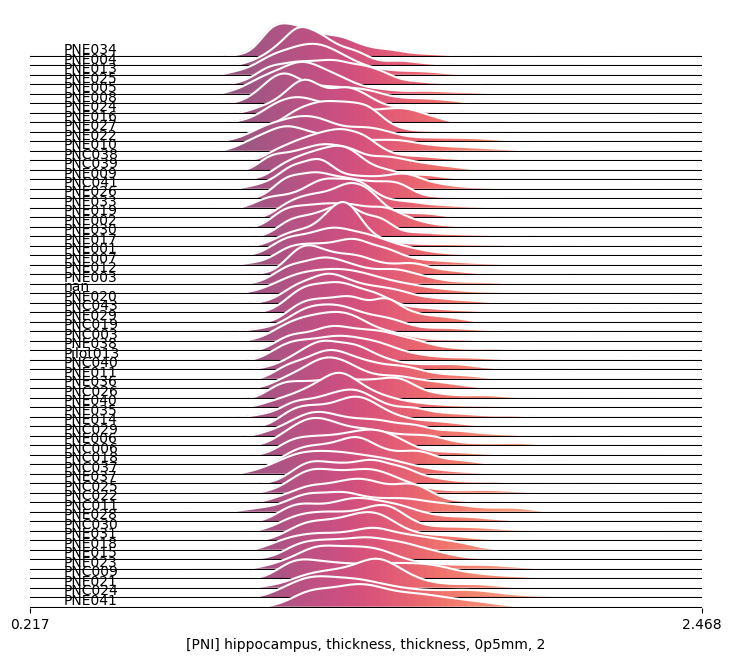

[MICs] hippocampus, thickness, thickness, 0p5mm , 5


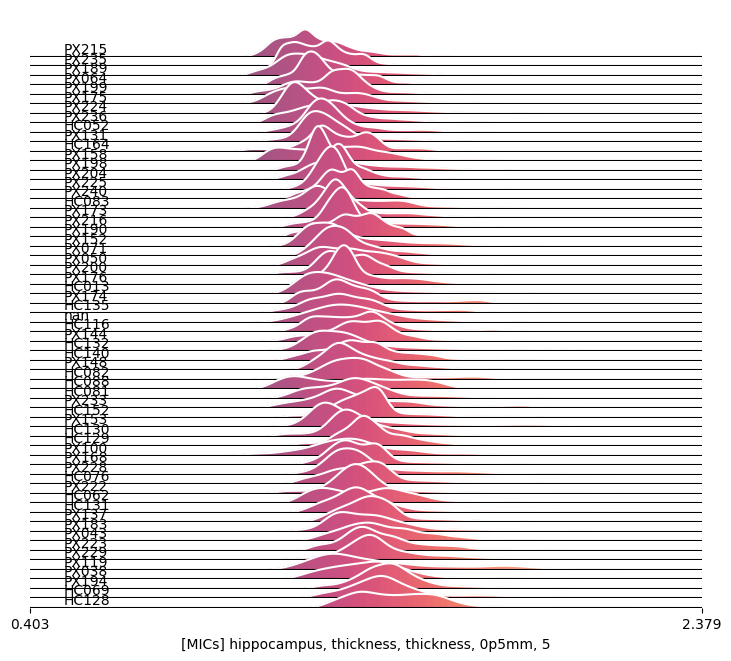

[PNI] hippocampus, thickness, thickness, 0p5mm , 5


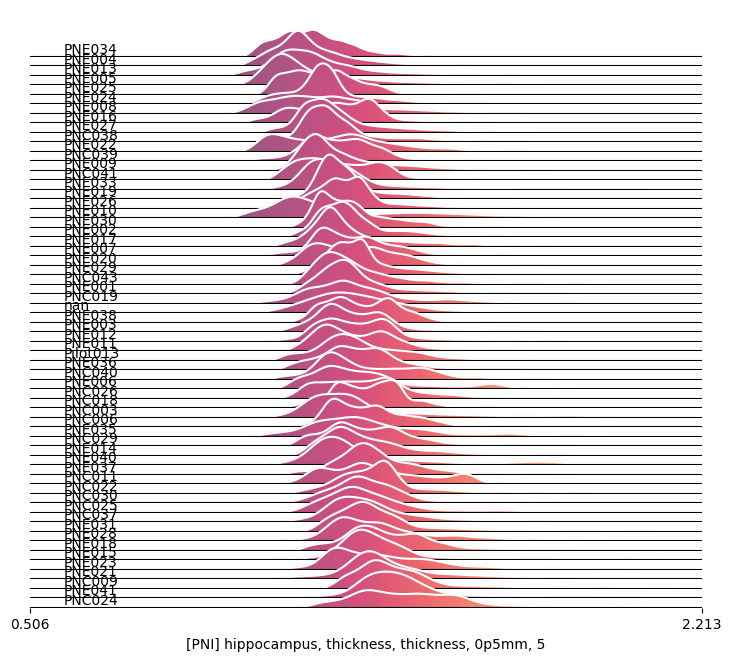

[MICs] hippocampus, T1map, midthickness, 0p5mm , 2


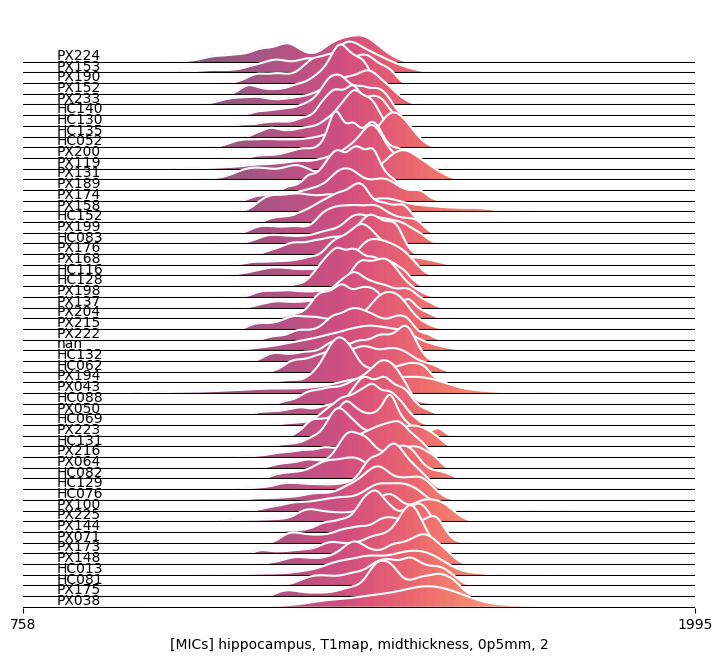

[PNI] hippocampus, T1map, midthickness, 0p5mm , 2


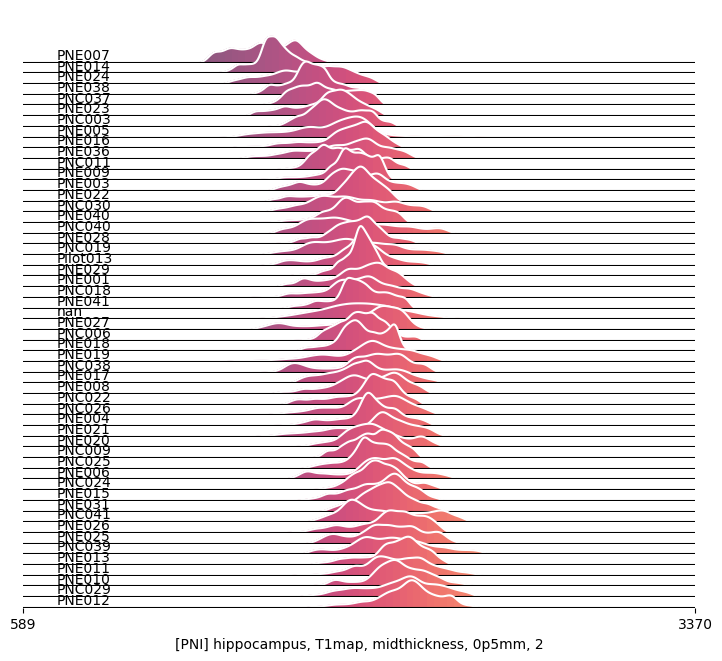

[MICs] hippocampus, T1map, midthickness, 0p5mm , 5


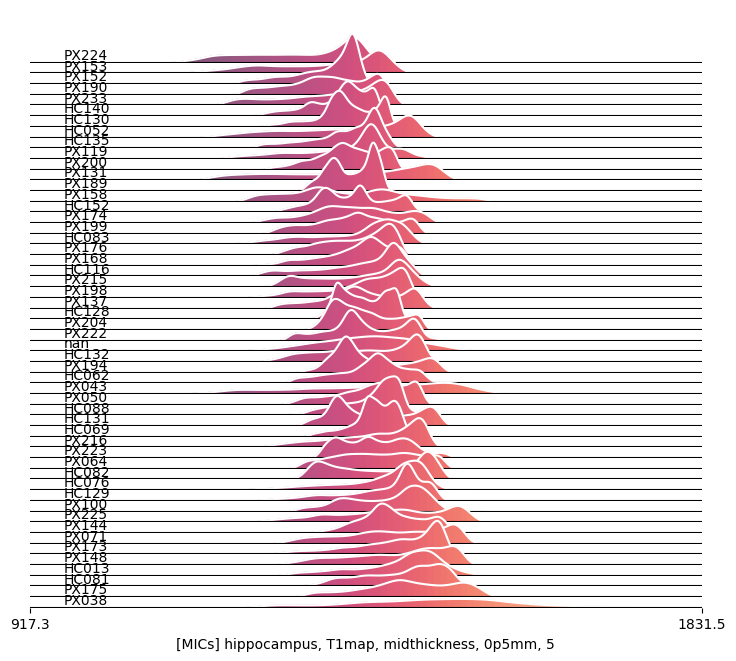

[PNI] hippocampus, T1map, midthickness, 0p5mm , 5


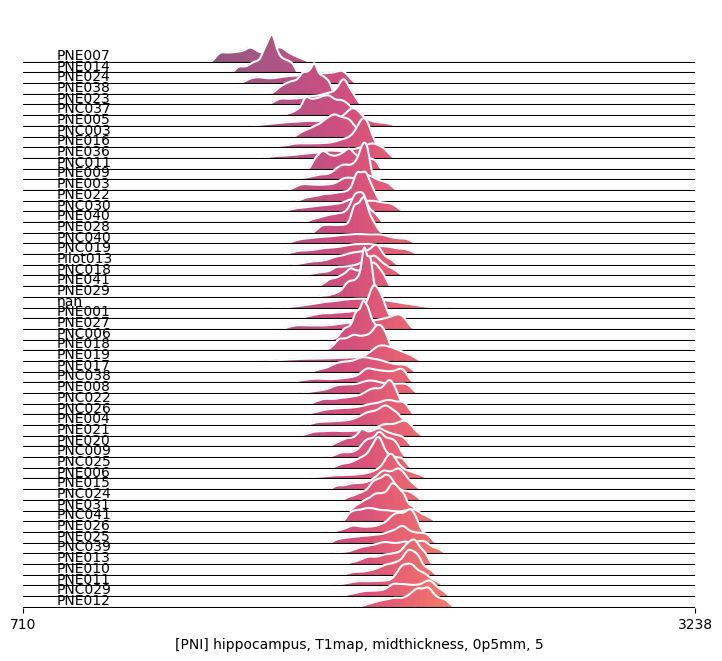

[MICs] hippocampus, flair, midthickness, 0p5mm , 2


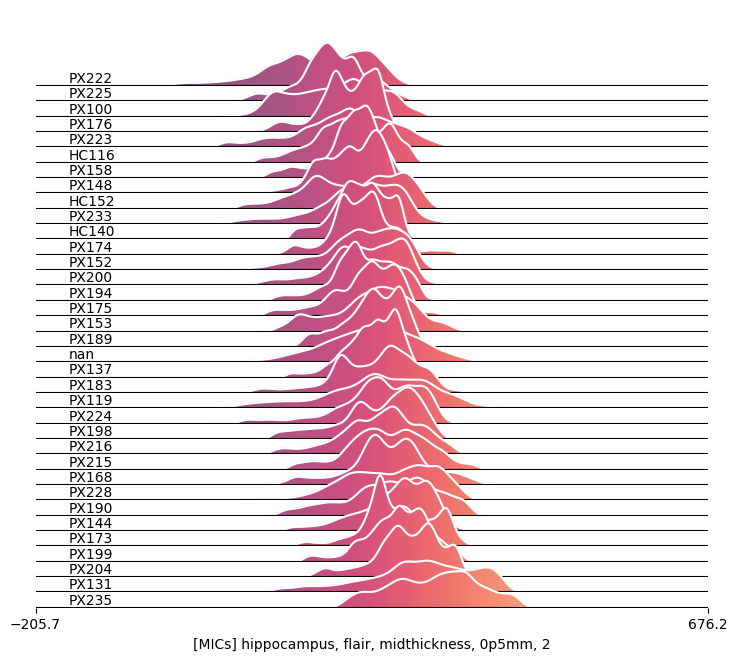

[PNI] hippocampus, flair, midthickness, 0p5mm , 2


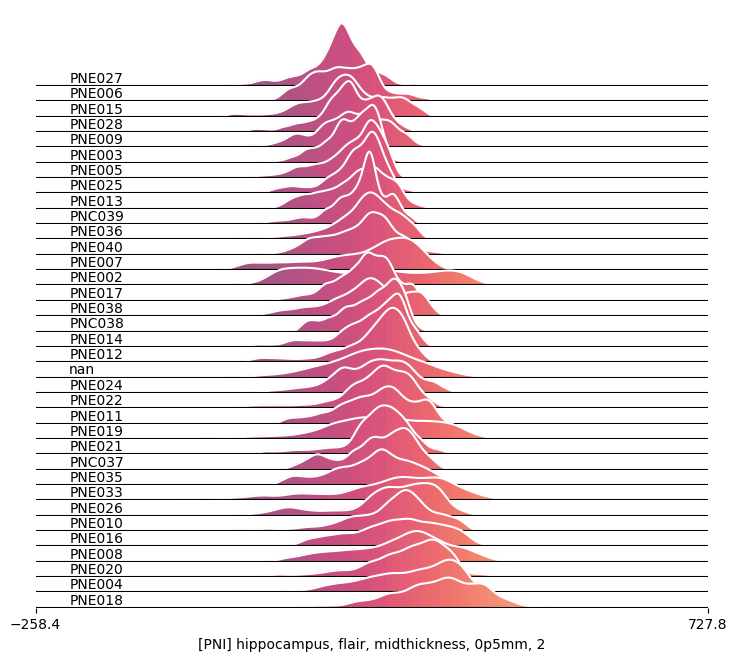

[MICs] hippocampus, flair, midthickness, 0p5mm , 5


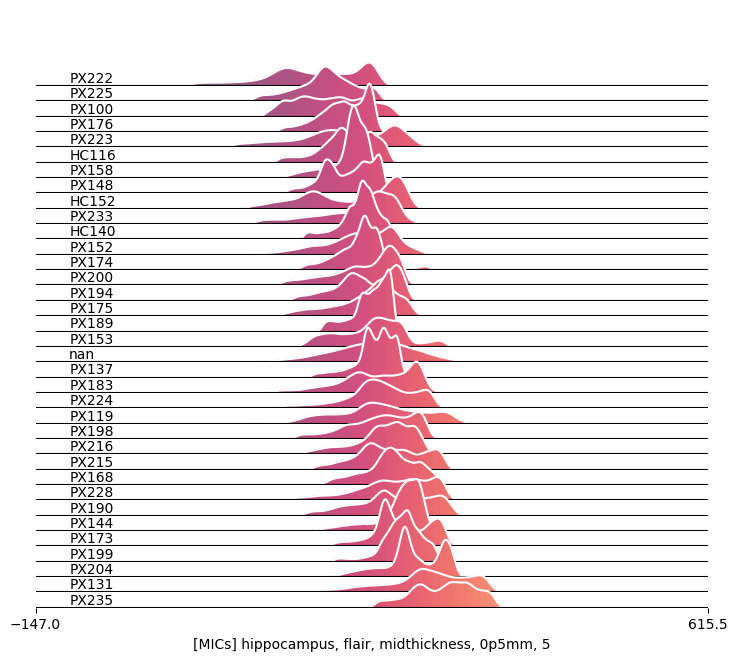

[PNI] hippocampus, flair, midthickness, 0p5mm , 5


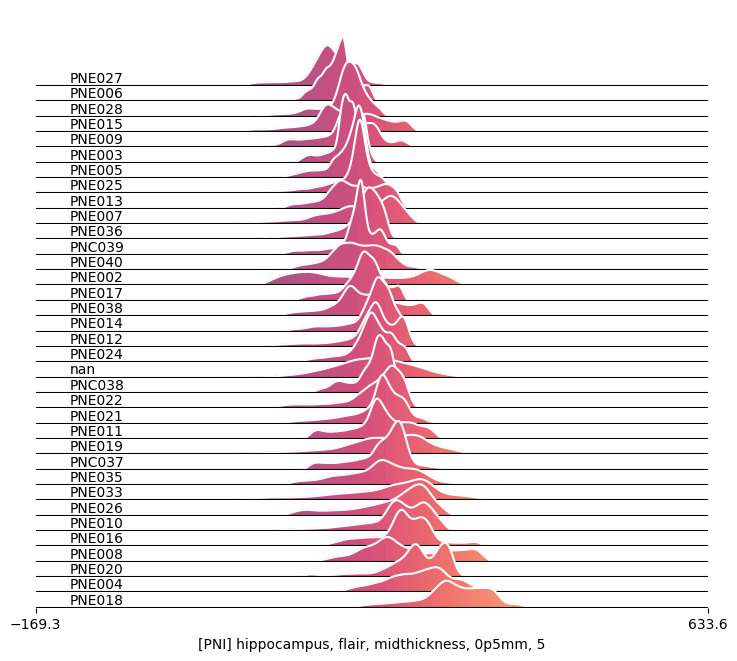

In [57]:
# ridge plots for individual patients, import dictionary lists with raw maps
# import dictionary lists with raw maps
pth = "/host/verges/tank/data/daniel/3T7T/z/maps/dictLists"
file = "/01_maps_08Sep2025-100948.pkl"

with open(pth + file, "rb") as f:
    dl = pickle.load(f)

demographics = {
    "pth" : "/host/verges/tank/data/daniel/3T7T/z/data/pt/demo_27Aug2025.csv",
    # column names:
    'nStudies': True, # whether multiple studies are included
    "ID_7T" : "PNI_ID", 
    "ID_3T" : "MICS_ID",
    "SES" : "SES",
    "date": "Date",
    "age": "age",
    "grp" : "grp_detailed" # col name for participant grouping variable of interest
}

#tsutil.print_dict(dl, df_print=False)

for i in range(len(dl)):
    df_demo = dl[i]['df_demo']
    df_maps = dl[i]['df_maps']
    label = dl[i]['label']
    surface = dl[i]['surf']
    region = dl[i]['region']
    feature = dl[i]['feature']
    study = dl[i]['study']
    smth = dl[i]['smth']
    print(f"[{study}] {region}, {feature}, {label}, {surface} , {smth}")

    #print(df_maps.columns)
    col_ID = tsutil.get_IDCol(study, demographics)

    # rename col_ID as ID
    df_demo.rename(columns={col_ID: 'id'}, inplace=True)

    # remove ID, SES cols
    df_maps['ID_SES'] = df_maps[col_ID].astype(str) + '_' + df_maps['SES'].astype(str) # concat ID and SES into single col
    df_maps.set_index('ID_SES', inplace=True)
    df_maps.drop([col_ID, 'SES'], axis=1, inplace=True)

    df_maps.head()

    # add a row to df_maps that randomly samples from a normal distribution centered around the mean of each column
    means = df_maps.mean(axis=0)
    stds = df_maps.std(axis=0)
    random_row = np.random.normal(loc=means, scale=stds)
    random_row_df = pd.DataFrame([random_row], index=['random_sample'], columns=df_maps.columns)
    df_maps = pd.concat([df_maps, random_row_df])
    # add also a row to df_demo with'grp_detailed' = 'random_sample'
    df_demo = pd.concat([df_demo, pd.DataFrame({'grp_detailed': ['random_sample']})], ignore_index=True)
    df_demo.set_index(df_maps.index, inplace=True)

    # plot ridgeplot
    # get range
    min_val = means.mean() - 10 * stds.mean()
    max_val = means.mean() + 10 * stds.mean()

    tsutil.plot_ridgeplot(df_maps, matrix_df=df_demo[['id','SES','grp_detailed']], Range=(min_val, max_val), Xlab = f"[{study}] {region}, {feature}, {label}, {surface}, {smth}")


In [ ]:
df_maps.describe()

0_L        1_L        2_L        3_L        4_L        5_L  \
count  54.000000  54.000000  54.000000  54.000000  54.000000  54.000000   
mean    2.942593   2.114773   2.753685   2.931125   2.570156   2.123705   
std     0.194728   0.186028   0.168895   0.283157   0.211261   0.191299   
min     2.341254   1.760463   2.298088   2.401582   2.083597   1.685283   
25%     2.840179   1.980402   2.635881   2.687776   2.433037   1.997606   
50%     2.965760   2.104150   2.755973   2.936324   2.564170   2.115520   
75%     3.097190   2.246593   2.856419   3.130938   2.697483   2.259995   
max     3.258609   2.522025   3.111148   3.583966   3.161658   2.598936   

             6_L        7_L        8_L        9_L  ...     4832_R     4833_R  \
count  54.000000  54.000000  54.000000  54.000000  ...  54.000000  54.000000   
mean    1.234717   2.309284   2.457176   2.720443  ...   2.561901   2.454398   
std     0.282396   0.198271   0.153764   0.296850  ...   0.272837   0.248387   
min     0.588444   1.850857   2.172873   1.940928  ...   1.938507   1.916066   
25%     1.076892   2.169913   2.370846   2.537826  ...   2.425812   2.265525   
50%     1.250048   2.277468   2.471389   2.699951  ...   2.593754   2.473105   
75%     1.413846   2.424637   2.542506   2.980275  ...   2.727374   2.615160   
max     2.030375   2.819730   2.875681   3.329206  ...   3.170731   3.118049   

          4834_R     4835_R     4836_R     4837_R     4838_R     4839_R  \
count  54.000000  54.000000  54.000000  54.000000  54.000000  54.000000   
mean    2.402563   2.428045   2.576633   2.475152   2.441684   2.585065   
std     0.240664   0.323631   0.275930   0.243591   0.248109   0.242141   
min     1.672408   1.588839   1.980408   1.846543   1.543527   1.904423   
25%     2.219451   2.302356   2.395416   2.269763   2.311842   2.422994   
50%     2.390258   2.473706   2.598931   2.522329   2.478179   2.608828   
75%     2.536326   2.645865   2.738814   2.627124   2.598763   2.732480   
max     2.949450   3.172638   3.258985   2.964514   2.867172   3.024780   

          4840_R     4841_R  
count  54.000000  54.000000  
mean    2.504805   2.580820  
std     0.210149   0.231322  
min     1.949498   2.120429  
25%     2.419889   2.386037  
50%     2.514528   2.593180  
75%     2.632583   2.730237  
max     2.936158   3.217489  

[8 rows x 9684 columns]

In [ ]:
def get_w(maps_ctrl, maps_px, demo_ctrl, demo_px, covars=['age','sex'], verbose=True):
    """
    Get W-scores for patient maps based on control maps and demographics.
    """

    # ensure that the covariates are in the demographics dataframes
    for covar in covars:
        if covar not in demo_ctrl.columns or covar not in demo_px.columns:
            raise ValueError(f"Covariate {covar} not found in demographics dataframes.")
    
    # ensure that the maps dataframes have the same columns
    if not all(maps_ctrl.columns == maps_px.columns):
        raise ValueError("Control and patient maps dataframes must have the same columns.")
    
    # calculate W-scores
    w_scores = tsutil.calculate_wscore_maps(maps_ctrl, maps_px, demo_ctrl, demo_px, normative_columns=covars, verbose=verbose)
    
    return w_scores

In [ ]:
def calculate_wscore_maps(reference_data, patient_data, demographics_ref, demographics_pat, output_file, 
                          normative_columns=['age', 'sex'], verbose=True):
    """ FROM Z-brains
    Calculate W-scores for patient data against reference data using normative modeling and save as GIFTI file.
    
    Parameters:
    -----------
    reference_data : np.ndarray
        Array of reference data with shape (n_subjects, n_vertices) or (n_subjects, n_vertices, n_depths)
    patient_data : np.ndarray
        Patient data with shape (n_vertices,) or (n_vertices, n_depths)
    demographics_ref : pd.DataFrame
        Demographics data for reference subjects with normative columns
    demographics_pat : pd.Series or pd.DataFrame
        Demographics data for patient (single row if DataFrame)
    output_file : str
        Path to save the W-score map
    normative_columns : list, default=['age', 'sex']
        List of demographic columns to use for normative modeling
    verbose : bool, default=True
        If True, prints processing information
    
    Returns:
    --------
    dict
        Dictionary containing W-score statistics, normative data, and file path
    """
    if len(reference_data) == 0:
        raise ValueError("No reference data provided")
    
    if len(reference_data) == 1:
        raise ValueError("Only one subject in reference data, cannot calculate W-scores")
    
    if demographics_ref.shape[0] != reference_data.shape[0]:
        raise ValueError("Demographics and reference data must have same number of subjects")
    
    # Handle multi-depth data (blur features) by averaging across depths
    if len(reference_data.shape) > 2:
        reference_data = np.mean(reference_data, axis=2)
    if len(patient_data.shape) > 1:
        patient_data = np.mean(patient_data, axis=1)
    
    n_vertices = reference_data.shape[1]
    
    # Get number of predictor variables
    n_predictors = len(normative_columns)
    
    # Prepare normative data storage - dynamic size based on number of predictors
    # Format: [intercept, coef_1, coef_2, ..., coef_n, std_residuals]
    normative_data = np.zeros((n_vertices, n_predictors + 2))
    
    # Prepare demographics data
    demo_ref = demographics_ref[normative_columns].copy()
    demo_pat = demographics_pat[normative_columns].copy() if isinstance(demographics_pat, pd.DataFrame) else demographics_pat[normative_columns]
    
    # Convert to numpy arrays
    X_ref = demo_ref.values.astype(float)
    X_pat = demo_pat.values.astype(float) if isinstance(demo_pat, pd.DataFrame) else demo_pat.values.astype(float)
    if len(X_pat.shape) > 1:
        X_pat = X_pat.flatten()
    
    # Remove subjects with missing demographic data
    mask = ~np.isnan(X_ref).any(axis=1)
    X_ref = X_ref[mask]
    ref_data_clean = reference_data[mask]
    
    if len(X_ref) == 0:
        raise ValueError("No reference subjects with complete demographic data")
    
    # Add intercept term
    X_ref_with_intercept = np.hstack([np.ones((X_ref.shape[0], 1)), X_ref])
    
    # Fit normative model for each vertex
    for i in range(n_vertices):
        vertex_data = ref_data_clean[:, i]
        
        # Skip vertices with all zeros
        if np.all(vertex_data == 0):
            # Initialize with zeros and set std to 1 to avoid division by zero
            normative_data[i, :] = 0
            normative_data[i, -1] = 1
            continue
        
        # Fit linear regression: y = intercept + coef_1*x_1 + coef_2*x_2 + ... + coef_n*x_n
        coefficients = np.linalg.lstsq(X_ref_with_intercept, vertex_data, rcond=None)[0]
        
        # Calculate residuals and their standard deviation
        predicted = X_ref_with_intercept @ coefficients
        residuals = vertex_data - predicted
        std_residuals = np.std(residuals)
        
        # Store all coefficients plus std_residuals
        normative_data[i, :-1] = coefficients
        normative_data[i, -1] = std_residuals
            

    
    # Calculate W-scores for patient
    wscores = np.zeros(n_vertices)
    
    for i in range(n_vertices):
        # Get coefficients and standard deviation
        coefficients = normative_data[i, :-1]  # All coefficients (intercept + predictors)
        std_residuals = normative_data[i, -1]  # Standard deviation of residuals
        
        # Calculate expected value: intercept + sum(coef_j * X_pat[j])
        expected = coefficients[0]  # Start with intercept
        for j in range(n_predictors):
            expected += coefficients[j+1] * X_pat[j]
        
        # Calculate W-score
        wscores[i] = (patient_data[i] - expected) / std_residuals
    
    # Create output directory
    os.makedirs(os.path.dirname(output_file), exist_ok=True)
    
    # Save W-score map
    wscore_data = nib.gifti.gifti.GiftiDataArray(
        data=wscores.astype(np.float32),
        intent="NIFTI_INTENT_NORMAL"
    )
    wscore_gii = nib.gifti.GiftiImage(darrays=[wscore_data])
    nib.save(wscore_gii, output_file)
    
    if verbose:
        print(f"    Saved W-score map: {output_file}")
    
    return {
        'wscore_file': output_file,
        'mean_wscore': np.mean(wscores),
        'std_wscore': np.std(wscores),
        'normative_data': normative_data,
        'reference_count': len(X_ref)
    }